# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# Log-Freq-Spec

Das Logarithmus-Frequenz-skalierte Spektrogramm enthält, im Gegensatz zu einer linearen Frequenz-Skala, pro Zeile Frequenzen die logarithmisch (entsprechend unserer Wahrnehmung) skaliert sind. Bspw. könnten die einzelnen Frequenzen einem bestimmten Stimmungssystem entsprechen.

Lasst uns zunächst eine herkömmliche STFT (Spektrogramm) betrachten:

In [2]:
!curl https://cdn.freesound.org/previews/94/94812_29541-lq.mp3 -o piano_scale.mp3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 78792  100 78792    0     0   351k      0 --:--:-- --:--:-- --:--:--  371k


In [3]:
# !cp piano_scale.mp3 ../data/snd/

/Users/danielhopfner/miniconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


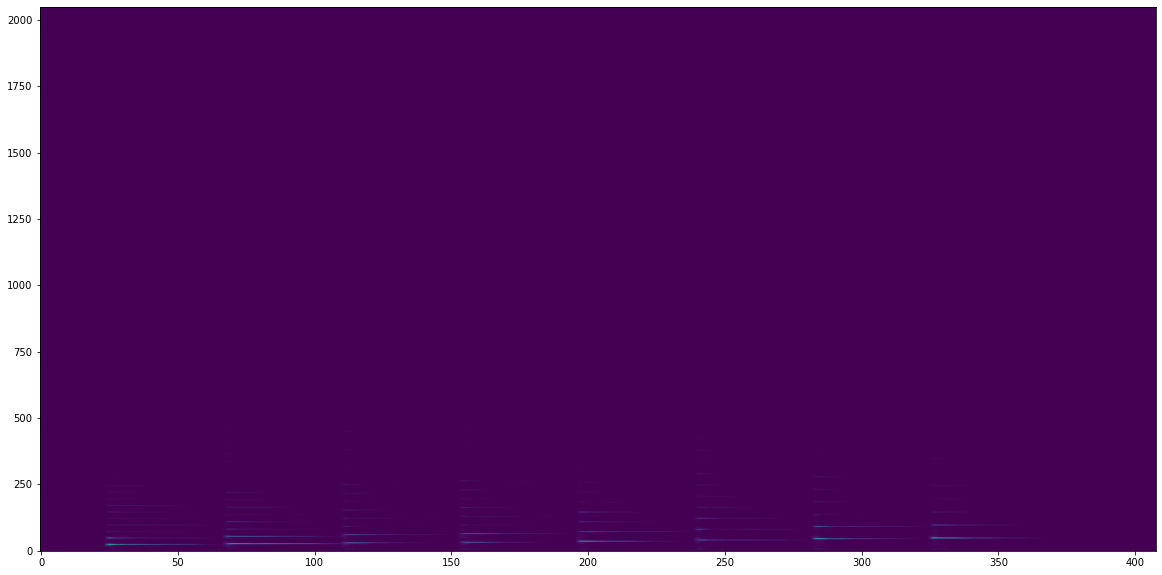

In [4]:
y, sr = lr.load('piano_scale.mp3', sr=44100)

display(Audio(y, rate=sr))

window_size = 4096

stft = lr.stft(y=y, n_fft=window_size)
plt.figure(figsize=(20, 10))
plt.imshow(np.abs(stft), aspect='auto', origin='lower')
plt.show()

## Einschub: Log-Gamma-Compression

Log-Gamma-Kompression ist eine Technik zur Anpassung der Lautstärke von Audiosignalen. Sie hilft, die leisen Teile lauter und die lauten Teile leiser zu machen, sodass sie im Spektrogramm besser sichtbar sind.

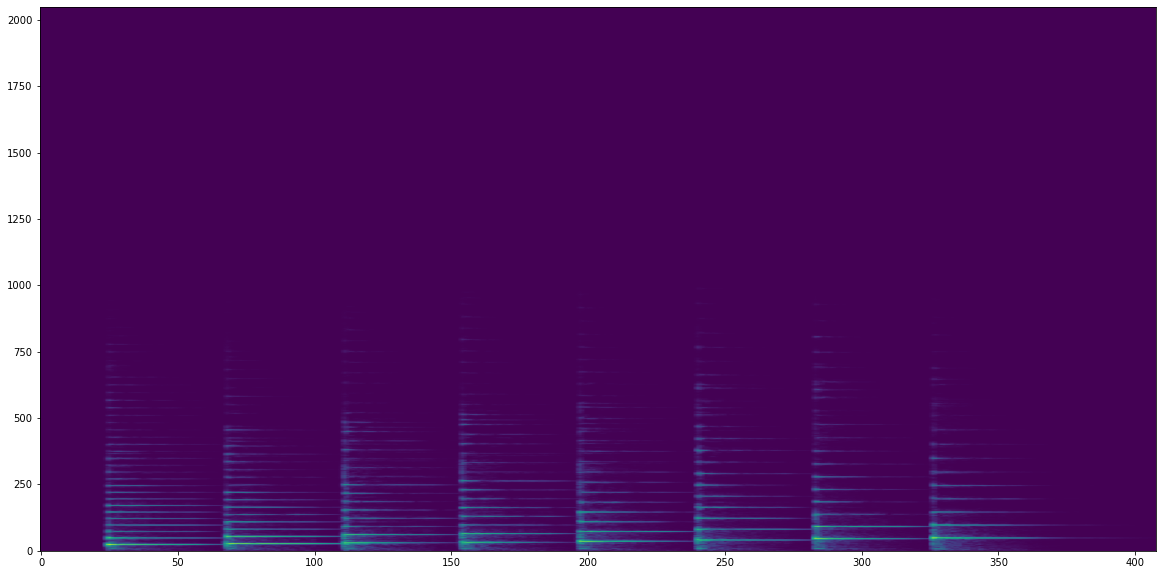

In [5]:
gamma = 1
stft_g = np.log10(1 + np.abs(stft) * gamma)

plt.figure(figsize=(20, 10))
plt.imshow(np.abs(stft_g), aspect='auto', origin='lower')
plt.show()

---

Da wir das Signal schon gehört haben, wissen wir, dass es sich um eine Dur-Tonleiter handelt. Würden wir aber das alleinstehende Spektrogramm betrachten, ist dies nicht so einfach zu erkennen.

Unser Ziel ist es, mit einem skalierten Spektrogramm (sog. Logarithmus-Frequenz-skaliertes Spektrogram) MIDI-Notenwerte anstatt Frequenz-Koeffizienten im Spektrogramm darzustellen.

Dazu müssen die einzelnen Frequenz-Koeffizienten, die nahe beieinander liegen, zu jeweils einem Pitch zusammengefasst werden.

In dem Fall definieren wir immer die Grenzen $p - 0.5$, $p + 0.5$ (also jew. ein Viertelton aufwärts oder abwärts) und summieren alle Frequenz-Koeffizienten, die sich innerhalb dieser Grenzen befinden, auf.

## Fahrplan

Unser Ziel ist es also, einzelne Frequenz-Bins (Koeffizienten) der STFT zu neuen Frequenz-Bins zusammenzufassen, die einer logarithmischen Skala (z.B. MIDI) entsprechen.

1. MIDI to Frequency: Um eine (MIDI-)Skala zu erstellen.

2. F_coef: Um die Frequenzen in Hz der Frequenz-Koeffizienten berechnen zu können.

3. Pitch-Zuordnung: Jedem MIDI-Pitch sollen nun Frequenz-Bins der STFT zugeordnet werden. Hierfür können wir festlegen, dass sich die zugehörigen Frequenzen in der Range (p +- 0.5) befinden sollen

4. Sum Bins per Pitch: Nun können wir die Magnituden der gesammelten Bins für jeden Pitch aufsummieren.

### MIDI to Frequency

<div style="background-color:lightyellow;border:solid lightgrey;padding:10px">

**Aufgabe 1**:

Schreibt eine Funktion `midi_to_frequency`, die die entsprechende Frequenz zu einem angegebenem MIDI-Notenwert ausgibt.
    
</div>

In [6]:
def midi_to_frequency(p):
    return ...

p = 69
print('p %d:\t%0.2f Hz' % (p, midi_to_frequency(p)))
print('upper:\t%0.2f Hz' % (midi_to_frequency(p + 0.5)))
print('lower:\t%0.2f Hz' % (midi_to_frequency(p - 0.5)))

p 69:	440.00 Hz
upper:	452.89 Hz
lower:	427.47 Hz


### Frequency Coefficient

<div style="background-color:lightyellow;border:solid lightgrey;padding:10px">

**Aufgabe 2**:

Schreibt eine Funktion `calc_f_coef`, die die entsprechende Frequenz zu einem angegebenem Frequenz-Index $k$ ausgibt.
    
</div>

In [7]:
def calc_f_coef(k, sr, N):
    return ...

print('f_res:\t%0.2f Hz\n' % (calc_f_coef(k=1, sr=sr, N=window_size)))

f_res:	10.77 Hz



### Find F-coef for a given pitch

Welche Frequenz-Koeffizienten befinden sich in der DFT (odef STFT) innerhalb der Grenzen $p - 0.5$, $p + 0.5$?

<div style="background-color:lightyellow;border:solid lightgrey;padding:10px">

**Aufgabe 3**:

Schreibt eine Funktion `freqs_in_dft`, die alle Frequenzen (in Hz) der jeweiligen Frequenz-Koeffizienten in einem Array (oder einer Liste) ausgibt, die sich innerhalb der Grenzen $p - 0.5$, $p + 0.5$ zu einem bestimmten MIDI-Notenwert befinden.

Tipps:

- Schreibt einen Loop, in dem über alle Frequenz-Indizes $k$ iteriert wird (gegeben die Fenstergröße $N$, wieviele $k$s sind für uns relevant?).
- Für jedes $k$ kann nun die entsprechende Frequenz ($f_{coef}$) errechnet werden.
- Wenn sich diese Frequenz innerhalb der beiden Grenzen $p - 0.5$ und $p + 0.5$ befindet (siehe die `if`-Abfrage), dann kann die Frequenz an die Liste `freqs` angehängt werden.
    
</div>

In [8]:
def freqs_in_dft(p, window_size, sr):

    f_coefs = ...

    freqs = np.array([], dtype=int)

    for k, f in enumerate(f_coefs):
        if (...):
            freqs = np.append(...)
    
    return freqs

p = 69
print('freqs in p %d:\t%s\n' % (p, freqs_in_dft(p, sr, window_size)))
p = 60
print('freqs in p %d:\t%s\n' % (p, freqs_in_dft(p, sr, window_size)))
p = 48
print('freqs in p %d:\t%s\n' % (p, freqs_in_dft(p, sr, window_size)))
p = 36
print('freqs in p %d:\t%s\n' % (p, freqs_in_dft(p, sr, window_size)))

freqs in p 69:	[427.52580499 427.61868481 427.71156463 427.80444444 427.89732426
 427.99020408 428.0830839  428.17596372 428.26884354 428.36172336
 428.45460317 428.54748299 428.64036281 428.73324263 428.82612245
 428.91900227 429.01188209 429.1047619  429.19764172 429.29052154
 429.38340136 429.47628118 429.569161   429.66204082 429.75492063
 429.84780045 429.94068027 430.03356009 430.12643991 430.21931973
 430.31219955 430.40507937 430.49795918 430.590839   430.68371882
 430.77659864 430.86947846 430.96235828 431.0552381  431.14811791
 431.24099773 431.33387755 431.42675737 431.51963719 431.61251701
 431.70539683 431.79827664 431.89115646 431.98403628 432.0769161
 432.16979592 432.26267574 432.35555556 432.44843537 432.54131519
 432.63419501 432.72707483 432.81995465 432.91283447 433.00571429
 433.0985941  433.19147392 433.28435374 433.37723356 433.47011338
 433.5629932  433.65587302 433.74875283 433.84163265 433.93451247
 434.02739229 434.12027211 434.21315193 434.30603175 434.39891

In [9]:
# interessante frage: warum gibt es für unterschiedliche pitches
# unterschiedlich viele frequenz-koeffizienten?

### Find k for a given pitch

Anstatt der genauen Frequenzen in Hertz, wollen wir nun aber wissen, welche Frequenz-Indizes (
) sich innerhalb der Grenzen (
, 
) in unserem Spektrogramm befinden

<div style="background-color:lightyellow;border:solid lightgrey;padding:10px">

**Aufgabe 4**:

Schreibt eine Funktion `ks_in_dft`, die anstatt der Frequenzen, die Indizes $k$ innerhalb der Viertelton-Grenzen für einen gegebenen Pitch ausgibt.

Tipps:

- Dazu kann `freqs_in_dft` zum größten Teil kopiert werden.
- Anstatt alle Frequenzen in `freqs` zu sammeln, sammeln wir nun alle k's in `ks` (oder einem ähnlichen Variablennamen).
- Dementsprechend muss also auch nicht der Frequenz-Koeffizient `f_coef` in den Array angefügt (`append`et) werden, sondern das jeweilige `k` im Loop.
    
</div>

In [10]:
def ks_in_dft(p, window_size, sr):

    ...
    
    return ks


p = 69
print('ks in p %d:\t%s' % (p, ks_in_dft(p, sr, window_size)))
p = 60
print('ks in p %d:\t%s' % (p, ks_in_dft(p, sr, window_size)))
p = 48
print('ks in p %d:\t%s' % (p, ks_in_dft(p, sr, window_size)))
p = 36
print('ks in p %d:\t%s' % (p, ks_in_dft(p, sr, window_size)))

ks in p 69:	[4603 4604 4605 4606 4607 4608 4609 4610 4611 4612 4613 4614 4615 4616
 4617 4618 4619 4620 4621 4622 4623 4624 4625 4626 4627 4628 4629 4630
 4631 4632 4633 4634 4635 4636 4637 4638 4639 4640 4641 4642 4643 4644
 4645 4646 4647 4648 4649 4650 4651 4652 4653 4654 4655 4656 4657 4658
 4659 4660 4661 4662 4663 4664 4665 4666 4667 4668 4669 4670 4671 4672
 4673 4674 4675 4676 4677 4678 4679 4680 4681 4682 4683 4684 4685 4686
 4687 4688 4689 4690 4691 4692 4693 4694 4695 4696 4697 4698 4699 4700
 4701 4702 4703 4704 4705 4706 4707 4708 4709 4710 4711 4712 4713 4714
 4715 4716 4717 4718 4719 4720 4721 4722 4723 4724 4725 4726 4727 4728
 4729 4730 4731 4732 4733 4734 4735 4736 4737 4738 4739 4740 4741 4742
 4743 4744 4745 4746 4747 4748 4749 4750 4751 4752 4753 4754 4755 4756
 4757 4758 4759 4760 4761 4762 4763 4764 4765 4766 4767 4768 4769 4770
 4771 4772 4773 4774 4775 4776 4777 4778 4779 4780 4781 4782 4783 4784
 4785 4786 4787 4788 4789 4790 4791 4792 4793 4794 4795 4796 4797

### Log-Freq-Spec-Function (sum bins)

Jetzt müssen wir nur noch das Log-Frequency-Spectrogram zusammenfügen:

<br/>

<div style="background-color:lightyellow;border:solid lightgrey;padding:10px">

**Aufgabe 5**:

Schreibt eine Funktion `stft_to_logfreq`, die aus einer STFT ein Log-Frequency-Spectrogram berechnet.

Tipps:

- Erstellt einen Array mit Nullen (`np.zeros`), der schon den richtigen `shape` hat: Anstatt `window_size` verschiedene Frequenzen haben wir nun 128 Pitches in jeder Zeile (`shape[0]`), `shape[1]` muss, also die Anzahl der berechneten Fenster, dem der STFT entsprechen.
- Jetzt muss jeder Pitch-Koeffizient innerhalb eines Loops berechnet werden (ingesamt 128 Pitches, also $0$ bis $127$).
- Innerhalb jedes Iterationsschritts benötigen wir die entsprechenden `ks` (Frequenz-Indizes) des jeweiligen Pitch (dafür können wir die Funktion `ks_in_dft` verwenden).

</div>

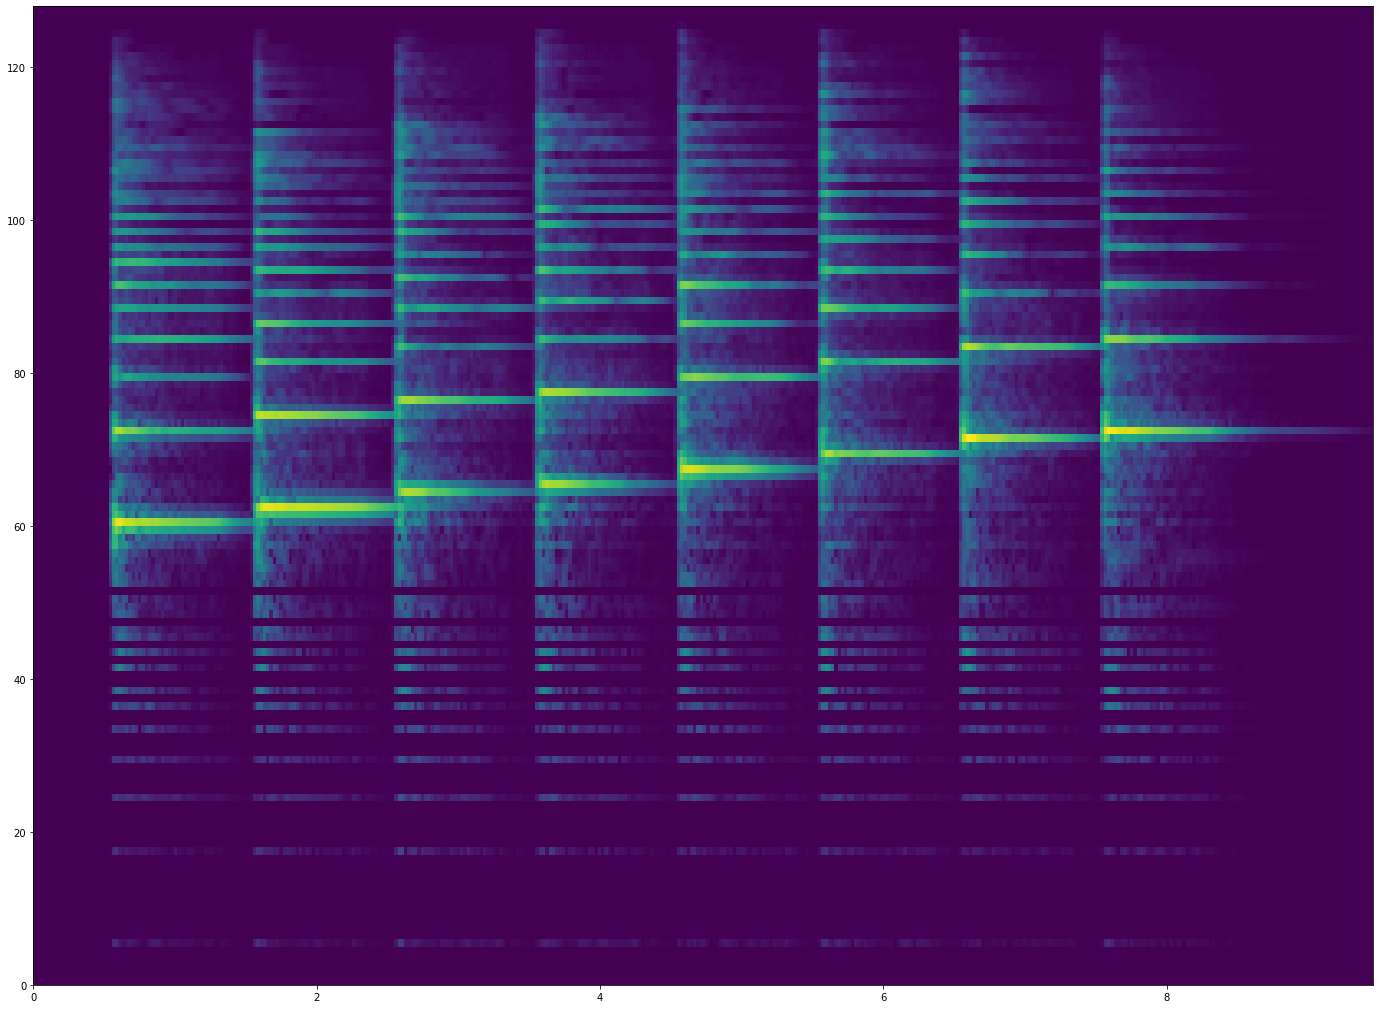

In [11]:
def stft_to_logfreq(stft, sr, window_size):

    logfreq = ...

    for ...:
    
        ks = ...
    
        # alle koeffizienten an den stellen `ks` aufsummieren
        logfreq[p, :] = np.sum(np.abs(stft[ks, :]), axis=...)
    
    return logfreq

logfreq = stft_to_logfreq(stft, sr, window_size)

# plot
gamma = 1
plt.figure(figsize=(24, 18))
plt.imshow(np.log10(1 + np.abs(logfreq) * gamma), aspect='auto',
           origin='lower',
           extent=[0, y.size / sr, 0, 128])
plt.show()

In [12]:
def calc_logfreq(y, sr, window_size):

    stft = lr.stft(y, n_fft=window_size)

    return stft_to_logfreq(stft, sr, window_size)